In [1]:
!pip install kmodes


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../Task 1/')
from efficient_apriori import apriori
from improved_apriori import Improved_Apriori
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from kmodes.kmodes import KModes


In [3]:
data = pd.read_csv('../Task 2/dataset/final_animedataset.csv')
data = data[['username', 'title']]
data = data.groupby('username')['title'].apply(list)
data = data.to_dict()

In [4]:
# Step 2: Frequent Itemset Generation
# Use the apriori algorithm to generate frequent itemsets
apriori = Improved_Apriori(data, min_support=0.4, min_confidence=1)
frequent_itemsets = apriori.apriori()


100%|██████████████████████████████████████████████████████████████████████████████████| 78/78 [00:02<00:00, 32.44it/s]
0it [00:00, ?it/s]


In [5]:
# Create a binary matrix
# Flatten the dictionary into a list of itemsets
from tqdm import tqdm
itemsets = [itemset for level in frequent_itemsets.values() for itemset in level.keys()]

# Transactions 
transactions = list(data.values())

binary_matrix = pd.DataFrame(0, index=range(len(transactions)), columns=itemsets)

# Fill in the binary matrix
for i, transaction in enumerate(tqdm(transactions)):
    for itemset in itemsets:
        if set(itemset).issubset(transaction):
            binary_matrix.at[i, itemset] = 1  # Use 'at' instead of 'loc' for scalar indexing

binary_matrix


100%|█████████████████████████████████████████████████████████████████████████| 116124/116124 [02:23<00:00, 808.51it/s]


,"(Angel Beats!,)","(Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.,)","(Another,)","(Ao no Exorcist,)","(Bakemonogatari,)","(Bleach,)","(Byousoku 5 Centimeter,)","(Clannad,)","(Clannad: After Story,)","(Code Geass: Hangyaku no Lelouch,)",...,"(Naruto, Naruto: Shippuuden)","(Shingeki no Kyojin, Steins;Gate)","(Shingeki no Kyojin, Sword Art Online)","(Shingeki no Kyojin, Toradora!)","(Steins;Gate, Sword Art Online)","(Sword Art Online, Toradora!)","(Code Geass: Hangyaku no Lelouch, Code Geass: Hangyaku no Lelouch R2, Death Note)","(Code Geass: Hangyaku no Lelouch, Death Note, Elfen Lied)","(Code Geass: Hangyaku no Lelouch, Death Note, Fullmetal Alchemist: Brotherhood)","(Death Note, Shingeki no Kyojin, Sword Art Online)"
0,0,0,0,0,0,0,1,1,0,1,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,1,0,0,1,0,0,...,1,1,1,1,1,1,0,0,0,1
4,0,0,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116119,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
116120,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,1,0,0
116121,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,0,1,1
116122,1,1,1,0,0,0,0,1,1,1,...,0,1,1,0,1,0,0,0,0,0


In [6]:
def k_modes_elbow(data, min_k, max_k):
    clusters = []

    cost = []  # To store the cost (inertia) for different values of k

    for k in range(min_k, max_k + 1):
        km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=0)
        km.fit(data)
        cost.append(km.cost_)
        clusters.append(km)

    # Plot the elbow curve
    plt.figure(figsize=(8, 5))
    plt.plot(range(min_k, max_k + 1), cost, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Cost')
    plt.title('Elbow Method for Optimal k')
    plt.show()
    return clusters

In [7]:
pca = PCA(n_components=4, random_state=42)
transformed_data = pca.fit_transform(binary_matrix)

In [ ]:
#Takes awhile to run
k_mode_clusters = k_modes_elbow(transformed_data, min_k = 2, max_k=40)

In [22]:
# Number of cluster for K-means to be 4 
k = 30
km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=0)
km.fit(binary_matrix)
cluster_labels = km.labels_
kmode_centroids = km._enc_cluster_centroids
#print(kmeans_centroids)
kmode_silhouette = silhouette_score(binary_matrix, cluster_labels)


In [21]:
kmode_silhouette

0.169840059706461

In [24]:
pca = PCA(n_components=4, random_state=42)
transformed_data = pca.fit_transform(binary_matrix)

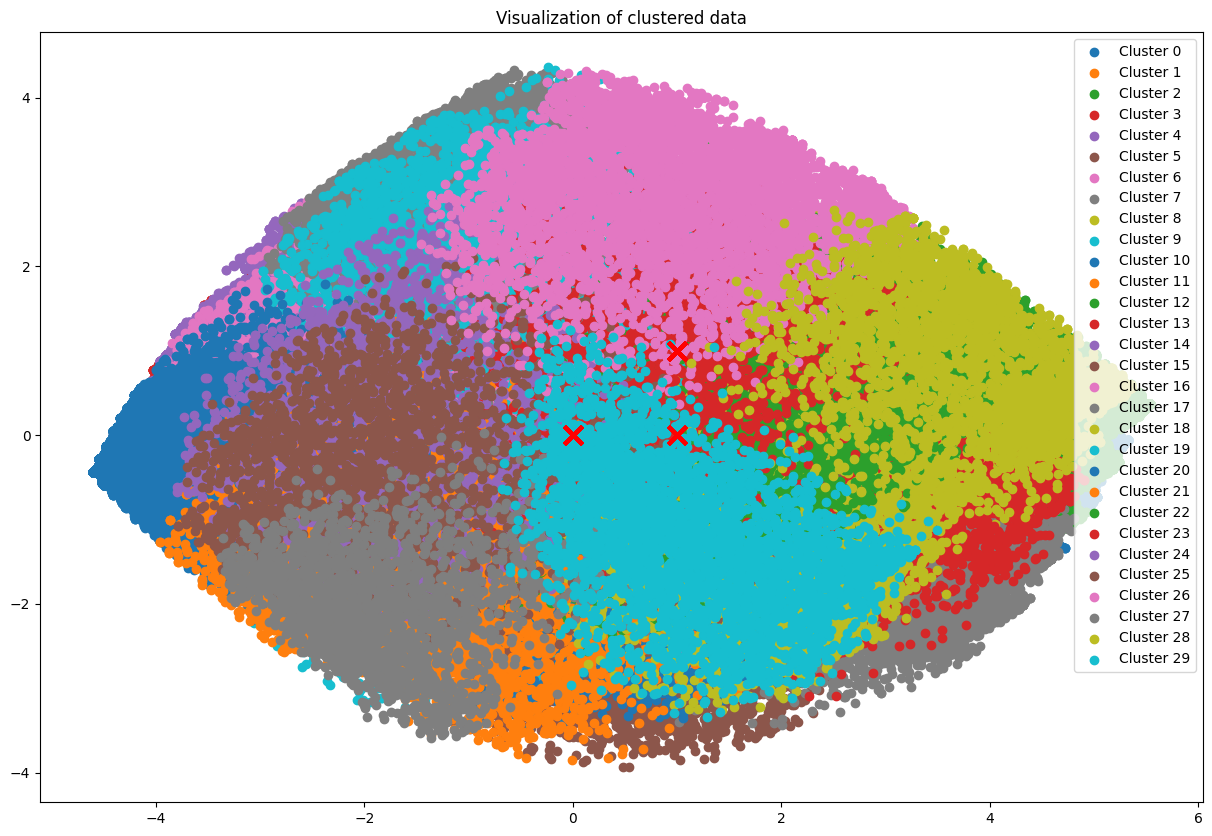

In [25]:
plt.figure(figsize=(15,10))
for i in range(k):
    plt.scatter(transformed_data[cluster_labels == i, 0], transformed_data[cluster_labels == i, 1], label='Cluster '+str(i))
plt.legend()

# Plot the centroids

plt.scatter(kmode_centroids[:, 0], kmode_centroids[:, 1], marker='x', s=169, linewidths=3, color='r', zorder=10)
plt.title('Visualization of clustered data')
plt.show()

/home/FYP/teog0015/.conda/envs/fyp_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


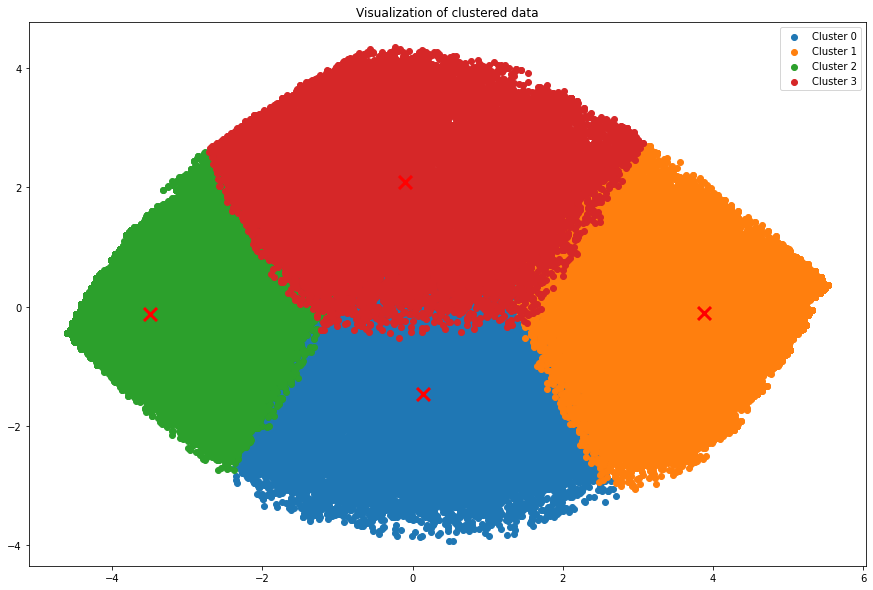

In [9]:
# Number of cluster for K-means to be 4 
k = 4
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(transformed_data)
cluster_labels = kmeans.labels_
kmeans_centroids = kmeans.cluster_centers_
#print(kmeans_centroids)
kmeans_silhouette = silhouette_score(transformed_data, cluster_labels)
plt.figure(figsize=(15,10))
for i in range(k):
    plt.scatter(transformed_data[cluster_labels == i, 0], transformed_data[cluster_labels == i, 1], label='Cluster '+str(i))
plt.legend()

# Plot the centroids

plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], marker='x', s=169, linewidths=3, color='r', zorder=10)
plt.title('Visualization of clustered data')
plt.show()

In [25]:
Kmeans_Normalized_silhouette, Kmeans_Normalized_davies_bouldin, Kmeans_Normalized_calinski_harabasz = evaluate_clustering(kmeans.labels_, transformed_normalized_data)

print(f'Kmeans Normalized Silhouette score: {Kmeans_Normalized_silhouette}')
print(f'Kmeans Normalized Davies-Bouldin Index: {Kmeans_Normalized_davies_bouldin}')
print(f'Kmeans Normalized Calinski-Harabasz Index: {Kmeans_Normalized_calinski_harabasz}')

Kmeans Normalized Silhouette score: 0.3842889987102743
Kmeans Normalized Davies-Bouldin Index: 1.1466148111099699
Kmeans Normalized Calinski-Harabasz Index: 91717.73445039341


/home/FYP/teog0015/.conda/envs/fyp_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


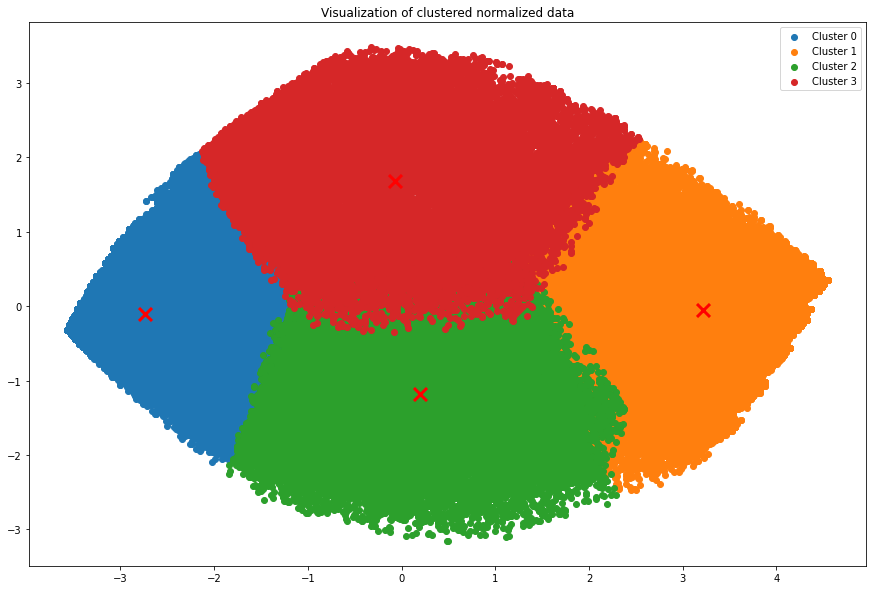

In [30]:
# Number of cluster for K-means to be 4 
k = 4
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(transformed_TF_IDF_data)
cluster_labels = kmeans.labels_
kmeans_centroids = kmeans.cluster_centers_
#print(kmeans_centroids)
kmeans_silhouette = silhouette_score(transformed_TF_IDF_data, cluster_labels)
plt.figure(figsize=(15,10))
for i in range(k):
    plt.scatter(transformed_TF_IDF_data[cluster_labels == i, 0], transformed_TF_IDF_data[cluster_labels == i, 1], label='Cluster '+str(i))
plt.legend()

# Plot the centroids
plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], marker='x', s=169, linewidths=3, color='r', zorder=10)
plt.title('Visualization of clustered TF-IDF normalized data')
plt.show()